In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  naive_bayes, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/andredias/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andredias/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/andredias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andredias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Importing and Exploring the Data

In [ ]:
data = open("training_set.txt",'r')
data = data.read()
data_split = data.splitlines()

In [ ]:
data_split = data_split[1:]   #removing column names

In [ ]:
dataframe = []
for i in data_split:
    dataframe.append(i.split('\t'))

In [ ]:
data_train = pd.DataFrame(dataframe, columns = ['Sentence', 'Emotion'] )

In [ ]:
data_train

,Sentence,Emotion
0,I'm too old to be traded in .,6
1,Mother said you could always tell a lady by he...,8
2,I always said I'd leave off when the time came .,6
3,He'll be safe with me .,2
4,Lay off .,1
...,...,...
13995,"Yes , Commissioner .",8
13996,The ring !,7
13997,That is my greatest and most enduring love .,5
13998,"When I came back from the war , I had a son .",5


In [ ]:
data_train['Emotion'].value_counts()

1    2999
2    2129
8    2095
5    1470
4    1442
6    1384
3    1343
7    1138
Name: Emotion, dtype: int64

<AxesSubplot:>

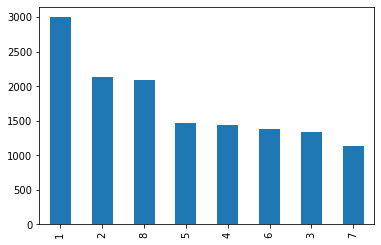

In [ ]:
data_train['Emotion'].value_counts().plot(kind='bar')

## 2. Preprocessing

### 2.1. Lower Case

In [ ]:
data_train['LowerCase'] = data_train['Sentence'].str.lower()

### 2.2. Ponctuation Removal

In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
data_train['PonctuationRemoval'] = data_train['LowerCase'].apply(remove_punctuations)

### 2.3. Stop Words Removal

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
list_aux=[]
n=0
for i in range(len(data_train)):
    phrase = data_train.iloc[i][3]
    phrase= phrase.split()
    aux_phrase = [t for t in phrase if t not in stop_words]
    new_phrase=" ".join(aux_phrase)
    list_aux.append(new_phrase)
    

data_train['StopWords'] = list_aux 

### 2.4. Tokenization

In [ ]:
data_train['Tokenization'] = [word_tokenize(entry) for entry in data_train['StopWords']]

### 2.5. Lemmatization

In [ ]:
wnl = WordNetLemmatizer()

In [ ]:
lem_list = []
for phrase in data_train['Tokenization']:
    list_aux = []
    for i in range(len(phrase)):
        list_aux.append(wnl.lemmatize(phrase[i]))
        sentence = ' '.join(list_aux)
    lem_list.append(sentence)
    
data_train['Lemmatization'] = lem_list

In [ ]:
data_train

,Sentence,Emotion,LowerCase,PonctuationRemoval,StopWords,Tokenization,Lemmatization
0,I'm too old to be traded in .,6,i'm too old to be traded in .,im too old to be traded in,im old traded,"[im, old, traded]",im old traded
1,Mother said you could always tell a lady by he...,8,mother said you could always tell a lady by he...,mother said you could always tell a lady by he...,mother said could always tell lady hands,"[mother, said, could, always, tell, lady, hands]",mother said could always tell lady hand
2,I always said I'd leave off when the time came .,6,i always said i'd leave off when the time came .,i always said id leave off when the time came,always said id leave time came,"[always, said, id, leave, time, came]",always said id leave time came
3,He'll be safe with me .,2,he'll be safe with me .,hell be safe with me,hell safe,"[hell, safe]",hell safe
4,Lay off .,1,lay off .,lay off,lay,[lay],lay
...,...,...,...,...,...,...,...
13995,"Yes , Commissioner .",8,"yes , commissioner .",yes commissioner,yes commissioner,"[yes, commissioner]",yes commissioner
13996,The ring !,7,the ring !,the ring,ring,[ring],ring
13997,That is my greatest and most enduring love .,5,that is my greatest and most enduring love .,that is my greatest and most enduring love,greatest enduring love,"[greatest, enduring, love]",greatest enduring love
13998,"When I came back from the war , I had a son .",5,"when i came back from the war , i had a son .",when i came back from the war i had a son,came back war son,"[came, back, war, son]",came back war son


In [ ]:
data_2 = data_train.copy()

## 3. Implemented Models

In [ ]:
data_2=data_2[['Emotion', 'Lemmatization']]

In [ ]:
data_2

,Emotion,Lemmatization
0,6,im old traded
1,8,mother said could always tell lady hand
2,6,always said id leave time came
3,2,hell safe
4,1,lay
...,...,...
13995,8,yes commissioner
13996,7,ring
13997,5,greatest enduring love
13998,5,came back war son


In [ ]:
X = data_2['Lemmatization']
y = data_2['Emotion']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 40, stratify = y, shuffle = True)

In [ ]:
count_vect = CountVectorizer()
count_vect.fit(data_2['Lemmatization'])

Train_Count_vect = count_vect.transform(X_train)
Val_Count_vect = count_vect.transform(X_val)

In [ ]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(data_2['Lemmatization'])

Train_X_Tfidf = Tfidf_vect.transform(X_train)
Val_X_Tfidf = Tfidf_vect.transform(X_val)

In [ ]:
#Run this cell to see the vocabulary of words
#print(Tfidf_vect.vocabulary_)

### 3.1. Model based on distances/similarity - MED

In [ ]:
def MED(sent_01, sent_02):
    n = len(sent_01)
    m = len(sent_02)

    matrix = [[i+j for j in range(m+1)] for i in range(n+1)]

    for i in range(1, n+1):
        for j in range(1, m+1):
            if sent_01[i-1] == sent_02[j-1]:
                d = 0
            else:
                d = 1

            matrix[i][j] = min(matrix[i-1][j]+1, matrix[i][j-1]+1, matrix[i-1][j-1]+d)

    distance_score = matrix[n][m]
   
    return distance_score

In [ ]:
### THIS CELL TAKES A LOT OF TIME TO RUN ###

prediction_list=[]
for t in data_2['Sentence']:
    data_2['distances']=data_2['Lemmatization'].apply(lambda x: MED(x, t))
    emotion_value=data_2.sort_values('distances').head(1)
    prediction_list.append(emotion_value['Emotion'].values[0])
    print(t.index)

data_2['prediction']= prediction_list

data_2['predict_boolean']=data_2['emotion'].equals(data_2['prediction'])
accuracy = data_2['predict_boolean'].sum()/len(data_2.index)
accuracy

### 3.2. Machine Learning Models

#### 3.2.1 KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Train_X_Tfidf,y_train)

predictions_KNN = knn.predict(Val_X_Tfidf)

print("KNN Accuracy Score: ",round(accuracy_score(predictions_KNN, y_val)*100), "%")

KNN Accuracy Score:  29 %


#### 3.2.2 Naive Bayes

In [ ]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,y_train)

predictions_NB = Naive.predict(Val_X_Tfidf)

print("Naive Bayes Accuracy Score: ",round(accuracy_score(predictions_NB, y_val)*100), "%")

Naive Bayes Accuracy Score:  32 %


#### 3.2.3 SVM

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,y_train)

predictions_SVM = SVM.predict(Val_X_Tfidf)

print("SVM Accuracy Score: ",round(accuracy_score(predictions_SVM, y_val)*100), "%")

SVM Accuracy Score:  35 %


### 3.4. Pre-Trained Models - Transfer Learning

#### 3.4.1 KNN with cosine Similarity

Now we will use a KNN approach using pretrained BERT Ebbeddings to classify the tweets of the test set As a similarity metric we are using cosine similarity

In [2]:
!pip install sentence_transformers
import pandas as pd
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 6.0 MB/s 
     |████████████████████████████████| 4.2 MB 17.4 MB/s 
     |████████████████████████████████| 1.2 MB 48.0 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 6.6 MB 48.2 MB/s 
     |████████████████████████████████| 596 kB 27.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=5c15828c22716372df9313c73b00296ac12ba81d0736dddf90c91ba75955920f
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [3]:
test = pd.read_csv("/content/test_df.csv")
train = pd.read_csv("/content/train_df.csv")

In [4]:
embeddings1 = model.encode(list(test.text), convert_to_tensor=True)
embeddings2 = model.encode(list(train.text), convert_to_tensor=True)

#Compute cosine-similarits
cosine_scores = util.cos_sim(embeddings2,embeddings1)

In [8]:
import numpy as np
from scipy import stats
import random
from sklearn.metrics import accuracy_score

distances = pd.DataFrame(cosine_scores.cpu().numpy(),index=list(train.label))

In [6]:
#Function to determine the mode of an iterable

def mode(ls):
    # dictionary to keep count of each value
    counts = {}
    # iterate through the list
    for item in ls:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
    # get the keys with the max counts
    return [key for key in counts.keys() if counts[key] == max(counts.values())]

In [9]:
#Tune best number of K. K=25 seems to be good. Should be tested on a seperate Test set or via Cross Validation

for k in range(1,30):
  predictions = list()
  for i in range(distances.shape[1]):
    predictions.append(random.choice(mode(distances.iloc[:,i].sort_values(ascending=False).iloc[:k].index)))
  print("K: ",k," --  Accuracy: ",accuracy_score(list(test.label), list(predictions)))


K:  1  --  Accuracy:  0.328
K:  2  --  Accuracy:  0.301
K:  3  --  Accuracy:  0.34
K:  4  --  Accuracy:  0.339
K:  5  --  Accuracy:  0.343
K:  6  --  Accuracy:  0.356
K:  7  --  Accuracy:  0.355
K:  8  --  Accuracy:  0.356
K:  9  --  Accuracy:  0.36
K:  10  --  Accuracy:  0.355
K:  11  --  Accuracy:  0.365
K:  12  --  Accuracy:  0.37
K:  13  --  Accuracy:  0.382
K:  14  --  Accuracy:  0.374
K:  15  --  Accuracy:  0.383
K:  16  --  Accuracy:  0.383
K:  17  --  Accuracy:  0.382
K:  18  --  Accuracy:  0.376
K:  19  --  Accuracy:  0.377
K:  20  --  Accuracy:  0.388
K:  21  --  Accuracy:  0.395
K:  22  --  Accuracy:  0.384
K:  23  --  Accuracy:  0.394
K:  24  --  Accuracy:  0.397
K:  25  --  Accuracy:  0.401
K:  26  --  Accuracy:  0.398
K:  27  --  Accuracy:  0.385
K:  28  --  Accuracy:  0.394
K:  29  --  Accuracy:  0.395


In a further step the dimensionality of the embeddings could be reduced using PCA or UMAP. Like many other similarity metrices Cosine similarity suffers, to some extend from high dimensionality of the input space..

#### 3.4.2 Fine-tuned ROBERTA Model 

In [10]:
!pip install datasets
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 20.5 MB/s 
     |████████████████████████████████| 212 kB 36.6 MB/s 
     |████████████████████████████████| 1.1 MB 66.4 MB/s 
     |████████████████████████████████| 140 kB 71.3 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 127 kB 60.2 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 271 kB 48.0 MB/s 
     |████████████████████████████████| 144 kB 51.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.5.1
    Uninstalling dill-0.3.5.1:
      Successfully uninstalled dill-0.3.5.1
ERROR: pip's dependency resolver does not currently take into account all 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from datasets import load_dataset
from datasets import Dataset

path_to_train_set = "/content/train_df.csv"
path_to_test_set = "/content/test_df.csv"

In [13]:
data_files = {"train": path_to_train_set, "test": path_to_test_set}
dataset = load_dataset("csv",data_files=data_files)

Using custom data configuration default-0a4623a1cef13afe


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-0a4623a1cef13afe/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [14]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [16]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized = dataset.map(preprocess_function, batched=True)

Parameter 'function'=<function preprocess_function at 0x7f57503820e0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/14 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [17]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

tf_train_set = tokenized["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "label"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_validation_set = tokenized["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "label"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

In [18]:
from transformers import create_optimizer
import tensorflow as tf

batch_size = 16
num_epochs = 5
batches_per_epoch = len(tokenized["train"]) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [19]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("distilroberta-base",num_labels = 8)

Downloading:   0%|          | 0.00/465M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
import tensorflow as tf

model.compile(optimizer=optimizer)

model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=3)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour, please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


Epoch 1/3
875/875 [==============================] - 93s 85ms/step - loss: 1.5725 - val_loss: 1.4287
Epoch 2/3
875/875 [==============================] - 66s 75ms/step - loss: 1.2837 - val_loss: 1.3980
Epoch 3/3
875/875 [==============================] - 66s 75ms/step - loss: 1.1090 - val_loss: 1.4450


In [21]:
#Load pandas dataset:

test_pandas = pd.read_csv(path_to_test_set)

from transformers import TextClassificationPipeline

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=False)

#Make predictions using the previously fine-tuned model
predictions = pipe(list(test_pandas.text))
y_pred = list(pd.DataFrame(predictions).label.str[-1].astype("float"))
y_true = list(test_pandas.label)

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.521

Although the hyperparamters of the model(learning rate etc.) could be fine tuned even further, we kept the chosen hyperparameter without tuning them. We are happy with an accuracy of 52% on the test set and focus our work on the "more interesting" methods that work without Transfer Learning

## 4. Predictions on Test Data

### 4.1. Importing the Test Set

In [ ]:
data = open("dev_set.txt",'r')
data = data.read()
data_split = data.splitlines()

data_split = data_split[1:]

dataframe = []
for i in data_split:
    dataframe.append(i.split('\t'))

data_test = pd.DataFrame(dataframe, columns = ['Sentence', 'Emotion'])
data_test

,Sentence,Emotion
0,What happens to the gold in our safe ?,4
1,Natural to get cold feet .,8
2,"Not very lucky , is he ?",7
3,I'm just a little anxious to get up there and ...,2
4,Did you think we don't know about your affair ...,1
...,...,...
995,All I ask of you is be careful .,4
996,"You don't like jazz , pal ?",7
997,Put it on .,1
998,Can you ever imagine [PERSON] being in a spot ...,7


### 4.2. Running Our Best Model - ROBERTA

Our best model is the fine-tuned ROBERTA model with an accuracy of more than 52% on the test set.

In [28]:
#Classification Report
from sklearn.metrics import classification_report

target_names = ["Emotion "+str(el) for el in range(1,9)]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Emotion 1       0.58      0.55      0.57       211
   Emotion 2       0.59      0.47      0.52       170
   Emotion 3       0.53      0.39      0.45        77
   Emotion 4       0.37      0.54      0.44       104
   Emotion 5       0.58      0.51      0.54        97
   Emotion 6       0.48      0.55      0.51        87
   Emotion 7       0.46      0.50      0.48        96
   Emotion 8       0.57      0.59      0.58       158

    accuracy                           0.52      1000
   macro avg       0.52      0.51      0.51      1000
weighted avg       0.53      0.52      0.52      1000

